In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
bus_data = pd.read_csv('DATA//250AC-SATURDAY.csv')

In [5]:
bus_data.head()

,bus_no,date,day,start_time,origin,destination,BSN_1,BSTT_1,BST_1,BSIN_1,...,BST_18,BSIN_18,BSOUT_18,BSC_18,BSN_19,BSTT_19,BST_19,BSIN_19,BSOUT_19,BSC_19
0,250AC,05-01-2019,SATURDAY,06:15,Yeshwanthpura TTMC,Chikkabanavara,Yeshwanthpura TTMC,00:00,06:15,2,...,07:21,0,0,9,Chikkabanavara,00:02,07:23,0,9,0
1,250AC,05-01-2019,SATURDAY,07:00,Yeshwanthpura TTMC,Chikkabanavara,Yeshwanthpura TTMC,00:00,07:00,2,...,08:06,2,0,8,Chikkabanavara,00:02,08:08,0,8,0
2,250AC,05-01-2019,SATURDAY,07:25,Yeshwanthpura TTMC,Chikkabanavara,Yeshwanthpura TTMC,00:00,07:25,15,...,08:31,2,0,9,Chikkabanavara,00:02,08:33,0,9,0
3,250AC,05-01-2019,SATURDAY,07:45,Yeshwanthpura TTMC,Chikkabanavara,Yeshwanthpura TTMC,00:00,07:45,10,...,08:51,2,0,11,Chikkabanavara,00:02,08:53,0,11,0
4,250AC,05-01-2019,SATURDAY,08:10,Yeshwanthpura TTMC,Chikkabanavara,Yeshwanthpura TTMC,00:00,08:10,9,...,09:16,3,2,13,Chikkabanavara,00:02,09:18,0,13,0


# BAGGING CLASSIFIER
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance


# New heading

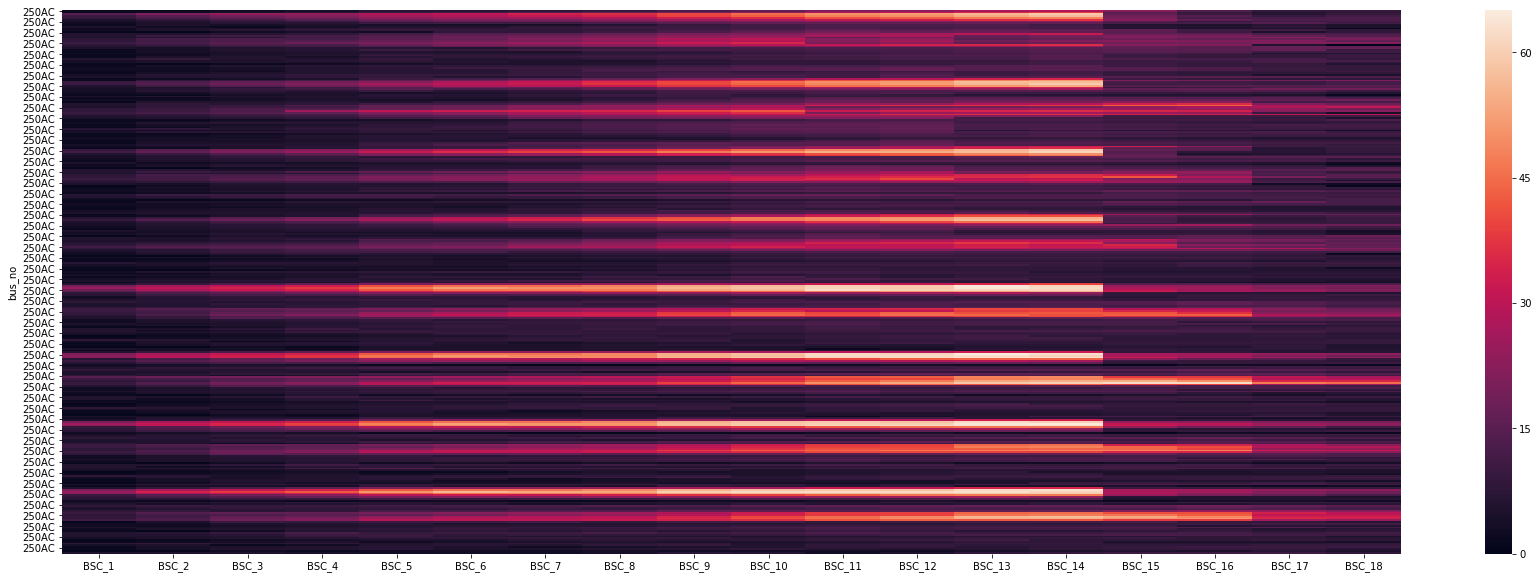

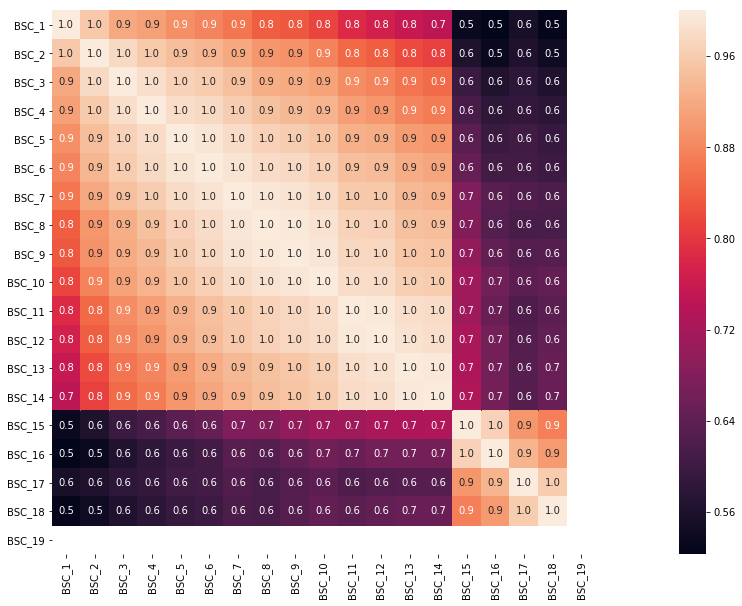

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv('DATA//250AC-SATURDAY.csv',index_col=0)
#df1[['BSC_1','BSC_2','BSC_3','BSC_4','BSC_5','BSC_6','BSC_7','BSC_8','BSC_9','BSC_10','BSC_11','BSC_12','BSC_13','BSC_14','BSC_15','BSC_16','BSC_17','BSC_18','BSC_19']].plot.bar()

# sns.distplot(df1[['BSC_1','BSC_2','BSC_3','BSC_4','BSC_5','BSC_6','BSC_7','BSC_8','BSC_9','BSC_10','BSC_11','BSC_12','BSC_13','BSC_14','BSC_15','BSC_16','BSC_17','BSC_18','BSC_19']])

plt.subplots(figsize=(30,10))
sns.heatmap(df1[['BSC_1','BSC_2','BSC_3','BSC_4','BSC_5','BSC_6','BSC_7','BSC_8','BSC_9','BSC_10','BSC_11','BSC_12','BSC_13','BSC_14','BSC_15','BSC_16','BSC_17','BSC_18']])

corr = df1[['BSC_1','BSC_2','BSC_3','BSC_4','BSC_5','BSC_6','BSC_7','BSC_8','BSC_9','BSC_10','BSC_11','BSC_12','BSC_13','BSC_14','BSC_15','BSC_16','BSC_17','BSC_18','BSC_19']].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" ) 

# busstop=df1[['BSC_1','BSC_2','BSC_3','BSC_4','BSC_5','BSC_6','BSC_7','BSC_8','BSC_9','BSC_10','BSC_11','BSC_12','BSC_13','BSC_14','BSC_15','BSC_16','BSC_17','BSC_18','BSC_19']]
# sns.jointplot(x='busstop',y='busstop',data='busstop',kind='hex')

In [6]:
import numpy as np
from numpy import empty
import pandas
import psycopg2
from datetime import datetime

conn = psycopg2.connect(database="lora_db", user = "postgres", password = "postgres", host = "127.0.0.1", port = "5432")
cur = conn.cursor()

sql_select_start_time = "SELECT DISTINCT start_time FROM bus250ac order by start_time;"
cur.execute(sql_select_start_time)

start_time_list = cur.fetchall()
for start_time in start_time_list:
    time=start_time[0].strftime("%H:%M:%S")
    print(time)
    print("-------")
    sql_select_count = "SELECT bsc_1, bsc_2, bsc_3, bsc_4, bsc_5, bsc_6, bsc_7, bsc_8, bsc_9, bsc_10, bsc_11, bsc_12, bsc_13, bsc_14, bsc_15, bsc_16, bsc_17, bsc_18, bsc_19 FROM bus250ac WHERE day like 'SATURDAY' and start_time = '"+time+"';"
    cur.execute(sql_select_count)
    count_list = cur.fetchall()
    a = np.array([0])
    for count in count_list:
        n_count = np.array(count)
        val = np.array(n_count.max()) 
        a=np.append(a,val)
#         print(a)
        max_crowd=a.max()
        print("The predicted average crowd at "+ str(time) +" is "+ str(max_crowd))
#         print(str(max_crowd))
    if max_crowd > 45 : 
        y=1
        print("NEW BUS REQUIRED")
    elif max_crowd <15 :
        y=2
        print("THIS SLOT CAN BE FREED")

06:15:00
-------
The predicted average crowd at 06:15:00 is 28
The predicted average crowd at 06:15:00 is 35
The predicted average crowd at 06:15:00 is 35
The predicted average crowd at 06:15:00 is 37
The predicted average crowd at 06:15:00 is 37
The predicted average crowd at 06:15:00 is 37
The predicted average crowd at 06:15:00 is 37
The predicted average crowd at 06:15:00 is 37
07:00:00
-------
The predicted average crowd at 07:00:00 is 38
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
The predicted average crowd at 07:00:00 is 51
NEW BUS REQUIRED
07:25:00
-------
The predicted average crowd at 07:25:00 is 59
The predicted average crowd at 07:25:00 is 59
The predicted average crowd at 07:25:00 is 59
The predicted average crowd at 07:25:00 is 59
The predicte

In [11]:
import numpy as np
from numpy import empty
import pandas
import psycopg2
from datetime import datetime
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

conn = psycopg2.connect(database="lora_db", user = "postgres", password = "postgres", host = "127.0.0.1", port = "5432")
cur = conn.cursor()

sql_select_start_time = "SELECT DISTINCT start_time FROM bus250ac order by start_time;"
cur.execute(sql_select_start_time)
url = "DATASET\\SATURDAY\\0615\\count.csv"
dataframe = pandas.read_csv(url, index_col=0)

start_time_list = cur.fetchall()
for start_time in start_time_list:
    time=start_time[0].strftime("%H:%M:%S")
#     print(time)
    sql_select_count = "SELECT bsc_1, bsc_2, bsc_3, bsc_4, bsc_5, bsc_6, bsc_7, bsc_8, bsc_9, bsc_10, bsc_11, bsc_12, bsc_13, bsc_14, bsc_15, bsc_16, bsc_17, bsc_18, bsc_19 FROM bus250ac WHERE day like 'SATURDAY' and start_time = '"+time+"';"
    cur.execute(sql_select_count)
    count_list = cur.fetchall()
    a = np.array([0])
    array = dataframe.values
    X = array[:,0:8] #The data to fit. Can be for example a list, or an array.
    Y = array[:,8] #The target variable to try to predict in the case of supervised learning.
    seed = 1000
    kfold = model_selection.KFold(n_splits=4, random_state=seed)
    cart = DecisionTreeClassifier()
    num_trees = 100
    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
#     print(model)
#     print("Prediction values: ", Y)
#     print("Robust estimate of model accuracy : ",results.mean())
    for count in count_list:
        n_count = np.array(count)
        val = np.array(n_count.max()) 
        a=np.append(a,val)
#         print(a)
        max_crowd=a.max()
#     print("The predicted average crowd at "+ str(time) +" is "+ str(max_crowd))
#     print(str(max_crowd))
    if max_crowd > 45 : 
        print("NEW BUS REQUIRED")
        y=1
    elif max_crowd <15 :
        y=2
        print("THIS SLOT CAN BE FREED")
    else:
        print("------")


------
NEW BUS REQUIRED
NEW BUS REQUIRED
NEW BUS REQUIRED
NEW BUS REQUIRED
NEW BUS REQUIRED
------
------
------
THIS SLOT CAN BE FREED
THIS SLOT CAN BE FREED
------
------
------
------
NEW BUS REQUIRED
NEW BUS REQUIRED
NEW BUS REQUIRED
NEW BUS REQUIRED
------
------
------
------
------
THIS SLOT CAN BE FREED
------
------
------
------
------
------
------
------
------
THIS SLOT CAN BE FREED
------
------
------


# 06:15 am

In [52]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

url = "DATASET\\SATURDAY\\0615\\count.csv"
dataframe = pandas.read_csv(url, index_col=0)

array = dataframe.values
X = array[:,0:8] #The data to fit. Can be for example a list, or an array.
Y = array[:,8] #The target variable to try to predict in the case of supervised learning.
seed = 1000
kfold = model_selection.KFold(n_splits=4, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(model)
print("Prediction values: ", Y)
print("Robust estimate of model accuracy : ",results.mean())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1000, verbose=0, warm_start=False)
Prediction values:  [1 1 2 2]
Robust estimate of model accuracy :  0.75


# 07:25 am

In [1]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

url = "DATASET\\SATURDAY\\0725\\count.csv"
dataframe = pandas.read_csv(url, index_col=0,axis = 1)

array = dataframe.values
X = array[:,0:8] #The data to fit. Can be for example a list, or an array.
Y = array[:,8] #The target variable to try to predict in the case of supervised learning.
seed = 1000
kfold = model_selection.KFold(n_splits=4, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(model)
print("Prediction values: ", Y)
print("Robust estimate of model accuracy : ",results.mean())

TypeError: parser_f() got an unexpected keyword argument 'axis'

In [54]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

url = "DATASET\\SATURDAY\\0725\\count.csv"
dataframe = pandas.read_csv(url, index_col=0)

array = dataframe.values
X = array[:,0:8] #The data to fit. Can be for example a list, or an array.
Y = array[:,8] #The target variable to try to predict in the case of supervised learning.
seed = 1000
kfold = model_selection.KFold(n_splits=4, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(model)
print("Prediction values: ", Y)
print("Robust estimate of model accuracy : ",results.mean())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1000, verbose=0, warm_start=False)
Prediction values:  [3 3 2 4]
Robust estimate of model accuracy :  0.25


# Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [77]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

url = "DATASET\\SATURDAY\\0725\\count.csv"
dataframe = pandas.read_csv(url, index_col=0)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 1000
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=4, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.0


In [72]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

url = "DATASET\\SATURDAY\\0725\\count.csv" #csv for day
dataframe = pandas.read_csv(url, index_col=0)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 1000
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=4, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.75


In [12]:
from wia import Wia

wia = Wia()
wia.access_token = "d_sk_KGUzj5zSmGgdjhc8i2O2hhKP"

wia.Location.publish(latitude=13.067874, longitude=77.504249)

SyntaxError: invalid syntax (stream_client.py, line 20)